####  Calculate the Landy-Szalay monopole for one SV tile with nbodykit.

Annoyingly, the nbodykit and DESI environments do not mesh, at all.  So it's necessary 
to first create the data tile with the DESI env (using the footprint tools) by running 
the relevant cells, then switch to nbodykit for running the remainder.

In [1]:
import os
import numpy                                        as     np
import astropy.io.fits                              as     fits
import pylab                                        as     pl

from   astropy.table                                import Table

In [2]:
from   desimodel.footprint                          import is_point_in_desi

In [3]:
##  Set up the usual base directories. 
basedir    = os.path.join(os.getenv('SCRATCH'), 'svdc-summer2018', 'master')
samplefile = os.path.join(basedir, 'bgs-gama-sample.fits')
tilesfile  = os.path.join(basedir, 'tiles', 'bgs-gama-tiles-bright.fits')

####  Prep. the galaxies for one SV tile, write to .fits for the remainder.

In [4]:
tiles = Table(fits.open(tilesfile)[1].data)
tiles

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,STAR_DENSITY,EXPOSEFAC,PROGRAM,OBSCONDITIONS
int32,float64,float64,int16,int16,float32,float32,float32,float32,str6,int32
100000,212.399993896,-0.819999992847,5,1,0.0504712,1.0,1.0,1.0,BRIGHT,4
100001,213.199996948,-0.800000011921,5,1,0.0498524,1.0,1.0,1.0,BRIGHT,4
100002,214.0,-0.77999997139,5,1,0.049985,1.0,1.0,1.0,BRIGHT,4
100003,214.799987793,-0.759999990463,5,1,0.0459586,1.0,1.0,1.0,BRIGHT,4
100004,215.599990845,-0.819999992847,5,1,0.0451689,1.0,1.0,1.0,BRIGHT,4
100005,216.399993896,-0.800000011921,5,1,0.042806,1.0,1.0,1.0,BRIGHT,4
100006,217.199996948,-0.77999997139,5,1,0.0435473,1.0,1.0,1.0,BRIGHT,4
100007,218.0,-0.759999990463,5,1,0.042242,1.0,1.0,1.0,BRIGHT,4
100008,218.799987793,-0.819999992847,5,1,0.042335,1.0,1.0,1.0,BRIGHT,4


In [5]:
##  Restrict to one tile
tiles = tiles[tiles['TILEID'] == 100000]
tiles

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,STAR_DENSITY,EXPOSEFAC,PROGRAM,OBSCONDITIONS
int32,float64,float64,int16,int16,float32,float32,float32,float32,str6,int32
100000,212.399993896,-0.819999992847,5,1,0.0504712,1.0,1.0,1.0,BRIGHT,4


In [6]:
##  The GAMA sample.
gama = Table(fits.open(samplefile)[1].data)
gama

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA_GAMA,DEC_GAMA,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG,D4000N,HB_EW,HA_EW,FIELD,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_U,FLUX_G,FLUX_R,FLUX_I,FLUX_Z,FLUX_Y,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_U,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_I,FLUX_IVAR_Z,FLUX_IVAR_Y,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_U,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_I,MW_TRANSMISSION_Z,MW_TRANSMISSION_Y,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_U,NOBS_G,NOBS_R,NOBS_I,NOBS_Z,NOBS_Y,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_U,RCHISQ_G,RCHISQ_R,RCHISQ_I,RCHISQ_Z,RCHISQ_Y,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_U,FRACFLUX_G,FRACFLUX_R,FRACFLUX_I,FRACFLUX_Z,FRACFLUX_Y,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_U,FRACMASKED_G,FRACMASKED_R,FRACMASKED_I,FRACMASKED_Z,FRACMASKED_Y,FRACIN_U,FRACIN_G,FRACIN_R,FRACIN_I,FRACIN_Z,FRACIN_Y,ANYMASK_U,ANYMASK_G,ANYMASK_R,ANYMASK_I,ANYMASK_Z,ANYMASK_Y,ALLMASK_U,ALLMASK_G,ALLMASK_R,ALLMASK_I,ALLMASK_Z,ALLMASK_Y,WISEMASK_W1,WISEMASK_W2,PSFSIZE_U,PSFSIZE_G,PSFSIZE_R,PSFSIZE_I,PSFSIZE_Z,PSFSIZE_Y,PSFDEPTH_U,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_I,PSFDEPTH_Z,PSFDEPTH_Y,GALDEPTH_U,GALDEPTH_G,GALDEPTH_R,GALDEPTH_I,GALDEPTH_Z,GALDEPTH_Y,WISE_COADD_ID,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_R_IVAR,SHAPEDEV_E1,SHAPEDEV_E1_IVAR,SHAPEDEV_E2,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_R_IVAR,SHAPEEXP_E1,SHAPEEXP_E1_IVAR,SHAPEEXP_E2,SHAPEEXP_E2_IVAR,FIBERFLUX_U,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_I,FIBERFLUX_Z,FIBERFLUX_Y,FIBERTOTFLUX_U,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_I,FIBERTOTFLUX_Z,FIBERTOTFLUX_Y,REF_ID,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,BRIGHTSTARINBLOB
int32,str23,int16,int16,int16,float32,str33,str9,int16,float64,float64,float32,float64,float32,int16,float32,str67,str88,str92,float32,float32,float32,str9,int32,int32,str8,int32,str4,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,bool
6802,GAMAJ113601.43+004315.3,4104,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,0.05054,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_187.png,1.81131,5.20334,27.8028,G12,7000,335384,1741p007,1909,EXP,174.005987533,0.72094157246,7.40685e+12,4.4597e+12,475690.0 .. 615579.0,0.0223431,0.0,22.1154,36.5512,0.0,50.9447,0.0,35.6419,23.8391,34.8189,17.7839,0.0,385.058,266.155,0.0,27.5049,0.0,2.46397,0.472394,0.00088903,2.01315e

In [7]:
print('Number of GAMA galaxies in the tile: {}'.format(len(gama['RA'])))

Number of GAMA galaxies in the tile: 132487


In [8]:
sv_cut = is_point_in_desi(tiles, gama['RA'], gama['DEC'], radius=None)

In [9]:
svgama = gama[sv_cut]

Text(0,0.5,'Declination [deg.]')

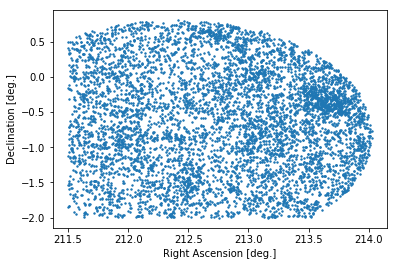

In [11]:
pl.scatter(gama[sv_cut]['RA'], gama[sv_cut]['DEC'], s=2)

pl.xlabel(r'Right Ascension [deg.]')
pl.ylabel(r'Declination [deg.]')

In [19]:
svgama.write('/global/cscratch1/sd/mjwilson/svdc-summer2018/data/gama_100000.fits', overwrite=True)

####  Now switch to the nbodykit environment.  Note:  do not attempt to make DESI-like calls.

In [3]:
import os
import numpy                                        as     np
import astropy.io.fits                              as     fits
import pylab                                        as     pl

from   astropy.table                                import Table

In [4]:
from   nbodykit.lab                                 import *
from   nbodykit.source.catalog.file                 import FITSCatalog
from   nbodykit.algorithms.pair_counters.mocksurvey import SurveyDataPairCount
from   nbodykit.transform                           import SkyToCartesian

In [17]:
# Define a fiducial (BOSS DR12) cosmology
cosmo = cosmology.Cosmology(h=0.676).match(Omega0_m=0.31)

In [6]:
gama  = FITSCatalog('/global/cscratch1/sd/mjwilson/svdc-summer2018/data/gama_100000.fits')

In [10]:
gama['WEIGHT']   = np.ones_like(gama['RA'])
gama['Redshift'] = np.ones_like(gama['Z'])

In [11]:
rand  = FITSCatalog('/global/cscratch1/sd/mjwilson/svdc-summer2018/randoms/svrand_100000.fits')

In [13]:
rand['WEIGHT']   = np.ones_like(rand['RA'])
rand['Redshift'] = np.random.choice(gama['Z'], size=len(rand['RA']), replace=True)

In [18]:
##  Limit to the first 50,000 randoms for ease. 
rand = rand[:50000]

####  Note everything here is DASK:  calls set up a network of "graphs" that are evaluated on .compute().
E.g: 

In [15]:
rand['Redshift'].compute()

array([0.46787, 0.26119, 0.14459, ..., 0.54199, 0.33692, 0.23939],
      dtype=float32)

In [16]:
rand['Position'] = SkyToCartesian(rand['RA'], rand['DEC'], rand['Redshift'], cosmo, degrees=True, frame='icrs')
rand['Position'].compute()

array([[-1.06642644e+03, -6.39746207e+02, -7.78041193e+00],
       [-6.29345071e+02, -3.77276580e+02, -3.58448043e+00],
       [-3.58992574e+02, -2.15182867e+02, -1.16439375e+00],
       ...,
       [-1.20774208e+03, -7.30343665e+02, -3.17719073e+01],
       [-7.94684729e+02, -4.78418416e+02, -1.84813199e+01],
       [-5.78999806e+02, -3.49339867e+02, -1.38856756e+01]])

#### Now, calculate the Landy-Szalay monopole for this tile of randoms and galaxies.  Note:  nbodykit calls corrfunc (https://corrfunc.readthedocs.io/en/master/) under the hood.

In [19]:
##  First define the binning edges;  Expected units for distances are Mpc/h and degrees.
edges = np.arange(1., 1000., 10.)
edges

array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.,
       111., 121., 131., 141., 151., 161., 171., 181., 191., 201., 211.,
       221., 231., 241., 251., 261., 271., 281., 291., 301., 311., 321.,
       331., 341., 351., 361., 371., 381., 391., 401., 411., 421., 431.,
       441., 451., 461., 471., 481., 491., 501., 511., 521., 531., 541.,
       551., 561., 571., 581., 591., 601., 611., 621., 631., 641., 651.,
       661., 671., 681., 691., 701., 711., 721., 731., 741., 751., 761.,
       771., 781., 791., 801., 811., 821., 831., 841., 851., 861., 871.,
       881., 891., 901., 911., 921., 931., 941., 951., 961., 971., 981.,
       991.])

In [20]:
##  Calls to corrfunc. (https://corrfunc.readthedocs.io/en/master/)
rr = SurveyDataPairCount('1d', rand, edges, cosmo=cosmo, second=rand, ra='RA', dec='DEC', redshift='Redshift', weight='Weight', show_progress=True)

In [ ]:
rr.run()

In [ ]:
rr = rr.pairs

In [ ]:
rr.variables

['r', 'npairs', 'wnpairs']

In [ ]:
rr['r']

array([  6.3098579 ,  15.82891334,  26.00575066,  35.85987912,
        46.00542361,  56.07495993,  65.99944944,  75.81758467,
        86.05289972,  95.93966462, 105.95926941, 116.05954243,
       126.02170314, 135.80464663, 146.01513916, 156.03325412,
       166.04701681, 176.04085988, 185.96450901, 195.96918219,
       205.94411695, 215.87213704, 226.03334694, 236.19053529,
       245.84457257, 255.93685786, 266.04354512, 275.90949333,
       286.04140414, 296.10193253, 306.01264199, 316.00988011,
       325.947412  , 335.97437668, 345.93431075, 356.08195045,
       365.98950635, 375.86041848, 386.05816217, 395.86061784,
       406.02483242, 415.95480633, 425.91577935, 435.94466831,
       445.92713411, 455.92393136, 465.95675972, 476.11874105,
       485.87590404, 495.99976931, 506.00187392, 516.00090032,
       525.89577442, 535.92498039, 546.0445649 , 556.10704367,
       566.03264319, 576.00660241, 585.79118827, 596.14173039,
       606.08129761, 615.95457772, 626.12386082, 635.80

In [ ]:
rr['npairs']

array([80246414, 64364976, 61675362, 56422428, 49269960, 51067086,
       55379248, 48536694, 49343656, 50006878, 46802582, 45679708,
       48791926, 44090132, 40841058, 44408910, 42814636, 44442768,
       44222936, 44525302, 43537282, 37940342, 34205888, 39202846,
       41529084, 35965218, 37429438, 37258326, 34692324, 36897728,
       39424546, 39881342, 41742566, 39829304, 33943394, 33711962,
       36032070, 33672452, 32376524, 31036366, 29158236, 28378540,
       26627108, 25568688, 25628618, 24583152, 21203238, 22380494,
       20980122, 20694506, 20725016, 20285192, 17978678, 15328870,
       15133816, 15493536, 18281340, 17876686, 15154064, 14060708,
       16679968, 16462422, 17114814, 17844230, 14052376, 12818582,
       12818470, 11769206, 11569418, 10987196, 11506560, 10557846,
        9611952,  8291188,  7906740,  6583820,  6532672,  6074212,
        5907596,  5960876,  6291224,  6064586,  5379920,  5108680,
        4581760,  4126914,  4339428,  6144190,  4702734,  3769

In [ ]:
rr['wnpairs']

array([80246414., 64364976., 61675362., 56422428., 49269960., 51067086.,
       55379248., 48536694., 49343656., 50006878., 46802582., 45679708.,
       48791926., 44090132., 40841058., 44408910., 42814636., 44442768.,
       44222936., 44525302., 43537282., 37940342., 34205888., 39202846.,
       41529084., 35965218., 37429438., 37258326., 34692324., 36897728.,
       39424546., 39881342., 41742566., 39829304., 33943394., 33711962.,
       36032070., 33672452., 32376524., 31036366., 29158236., 28378540.,
       26627108., 25568688., 25628618., 24583152., 21203238., 22380494.,
       20980122., 20694506., 20725016., 20285192., 17978678., 15328870.,
       15133816., 15493536., 18281340., 17876686., 15154064., 14060708.,
       16679968., 16462422., 17114814., 17844230., 14052376., 12818582.,
       12818470., 11769206., 11569418., 10987196., 11506560., 10557846.,
        9611952.,  8291188.,  7906740.,  6583820.,  6532672.,  6074212.,
        5907596.,  5960876.,  6291224.,  6064586., 

In [ ]:
rr.attrs['nrand'] = len(rand['RA'])
rr.attrs['nrand']

50000

In [ ]:
##  Distinct.
rr.attrs['expected_pairs'] = rr.attrs['nrand'] * (rr.attrs['nrand'] - 1) / 2.

In [ ]:
rr['npairs_norm'] = rr['npairs'] / rr.attrs['expected_pairs']

In [32]:
##  And for DD.
dd = SurveyDataPairCount('1d', gama, edges, cosmo=cosmo, second=gama, ra='RA', dec='DEC', redshift='Z', weight='Weight', show_progress=True)

In [33]:
dd.run()

In [34]:
dd = dd.pairs

In [35]:
dd['r']

array([  6.87385294,  15.9625299 ,  26.03554312,  35.8097312 ,
        45.95335777,  56.06153656,  66.01585982,  75.81440573,
        86.05464125,  95.94700276, 105.9701394 , 116.04005769,
       126.02977961, 135.80877408, 146.00806343, 156.04951803,
       166.03709339, 176.04096534, 185.95035007, 195.96372907,
       205.9560813 , 215.88231431, 226.04980343, 236.17011673,
       245.84103331, 255.93684146, 266.03429237, 275.92319323,
       286.03356237, 296.11619759, 305.99268073, 316.00905387,
       325.95074984, 335.97786783, 345.93676099, 356.06673602,
       365.98401315, 375.86640982, 386.05430568, 395.86429282,
       406.02314244, 415.96173574, 425.91462967, 435.94766307,
       445.94880932, 455.91908499, 465.94931362, 476.13323787,
       485.86997372, 495.98616331, 505.99592221, 516.00708634,
       525.90356567, 535.93012641, 546.02782352, 556.10678549,
       566.02358323, 575.98059914, 585.8409666 , 596.09835146,
       606.09271712, 615.95365758, 626.11792962, 635.82

In [36]:
dd['npairs']

array([ 881040, 1283664, 1284552, 1175368,  960920,  968784, 1028938,
        919038,  908992,  934322,  863398,  836912,  897528,  818710,
        764590,  822266,  798898,  817882,  814970,  814838,  793046,
        699812,  632588,  721114,  755850,  662528,  686284,  683832,
        636308,  678846,  728336,  734480,  769518,  730462,  629496,
        615738,  665508,  620870,  601500,  575640,  534436,  525074,
        492016,  469886,  471584,  456208,  396824,  417966,  394366,
        381534,  386134,  375934,  336784,  289106,  285476,  291092,
        336802,  329974,  280828,  263716,  309456,  311926,  318922,
        332342,  266742,  239392,  239458,  218720,  218716,  206462,
        213398,  195216,  181312,  153634,  148126,  125018,  121744,
        113030,  111538,  112780,  116894,  111640,   98992,   93234,
         84328,   77804,   81442,  112718,   87866,   69714,   66130,
         65642,   54766,   59562,   53998,   50716,   51692,   42900,
         46712], dty

In [37]:
dd['wnpairs']

array([ 881040., 1283664., 1284552., 1175368.,  960920.,  968784.,
       1028938.,  919038.,  908992.,  934322.,  863398.,  836912.,
        897528.,  818710.,  764590.,  822266.,  798898.,  817882.,
        814970.,  814838.,  793046.,  699812.,  632588.,  721114.,
        755850.,  662528.,  686284.,  683832.,  636308.,  678846.,
        728336.,  734480.,  769518.,  730462.,  629496.,  615738.,
        665508.,  620870.,  601500.,  575640.,  534436.,  525074.,
        492016.,  469886.,  471584.,  456208.,  396824.,  417966.,
        394366.,  381534.,  386134.,  375934.,  336784.,  289106.,
        285476.,  291092.,  336802.,  329974.,  280828.,  263716.,
        309456.,  311926.,  318922.,  332342.,  266742.,  239392.,
        239458.,  218720.,  218716.,  206462.,  213398.,  195216.,
        181312.,  153634.,  148126.,  125018.,  121744.,  113030.,
        111538.,  112780.,  116894.,  111640.,   98992.,   93234.,
         84328.,   77804.,   81442.,  112718.,   87866.,   697

In [38]:
dd.attrs['ngal'] = len(gama['RA'])
dd.attrs['ngal']

6790

In [39]:
dd.attrs['expected_pairs'] = dd.attrs['ngal'] * (dd.attrs['ngal'] - 1.) / 2.

In [40]:
print(dd['npairs'].sum() / dd.attrs['expected_pairs'])

1.9739888509763368


In [41]:
dd['npairs_norm'] = dd['npairs'] / dd.attrs['expected_pairs']

In [42]:
dd['npairs_norm']

array([0.03822522, 0.05569366, 0.05573219, 0.05099508, 0.04169094,
       0.04203213, 0.044642  , 0.03987382, 0.03943796, 0.04053694,
       0.0374598 , 0.03631067, 0.03894058, 0.03552094, 0.03317287,
       0.03567523, 0.03466137, 0.03548502, 0.03535868, 0.03535295,
       0.03440747, 0.03036238, 0.02744577, 0.0312866 , 0.03279367,
       0.02874476, 0.02977545, 0.02966906, 0.02760716, 0.02945274,
       0.03159994, 0.0318665 , 0.03338668, 0.03169217, 0.02731162,
       0.0267147 , 0.02887405, 0.02693736, 0.02609697, 0.02497499,
       0.0231873 , 0.02278111, 0.02134684, 0.0203867 , 0.02046037,
       0.01979326, 0.0172168 , 0.01813407, 0.01711015, 0.01655342,
       0.01675299, 0.01631045, 0.01461187, 0.01254329, 0.0123858 ,
       0.01262946, 0.01461265, 0.01431641, 0.01218414, 0.01144171,
       0.01342621, 0.01353337, 0.0138369 , 0.01441915, 0.011573  ,
       0.01038638, 0.01038924, 0.00948949, 0.00948932, 0.00895766,
       0.00925859, 0.00846974, 0.00786649, 0.00666564, 0.00642

In [43]:
##  And for DR.
dr = SurveyDataPairCount('1d', rand, edges, cosmo=cosmo, second=gama, ra='RA', dec='DEC', redshift='Redshift', weight='Weight', show_progress=True)

In [44]:
dr.run()

In [45]:
dr = dr.pairs

In [47]:
dr.attrs['nrand'] = len(rand['RA'])
dr.attrs['ngal']  = len(gama['RA'])

In [48]:
dr.attrs['expected_pairs'] = dr.attrs['ngal'] * dr.attrs['nrand']

In [49]:
dr['npairs_norm'] = dr['npairs'] / dr.attrs['expected_pairs']

In [50]:
dr['npairs_norm']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.00147275e-06,
       1.79381443e-05, 1.94432990e-05, 1.65036819e-05, 1.43151694e-05,
       2.79823270e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.71192931e-05, 7.74491900e-05, 3.54315169e-05,
       0.00000000e+00, 9.14845361e-05, 9.36200295e-05, 1.48954345e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.30397644e-05, 9.37231222e-05,
       3.23711340e-06, 0.00000000e+00, 0.00000000e+00, 1.26338733e-04,
       5.36612666e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

####  Use the calculated pair counts to estimate the Landy-Szalay monopole.

In [51]:
landy = {'r': dd['r'], 'xi': (dd['npairs_norm'] - 2.0 * dr['npairs_norm'] + rr['npairs_norm']) / rr['npairs_norm']}

In [52]:
landy['r']

array([  6.87385294,  15.9625299 ,  26.03554312,  35.8097312 ,
        45.95335777,  56.06153656,  66.01585982,  75.81440573,
        86.05464125,  95.94700276, 105.9701394 , 116.04005769,
       126.02977961, 135.80877408, 146.00806343, 156.04951803,
       166.03709339, 176.04096534, 185.95035007, 195.96372907,
       205.9560813 , 215.88231431, 226.04980343, 236.17011673,
       245.84103331, 255.93684146, 266.03429237, 275.92319323,
       286.03356237, 296.11619759, 305.99268073, 316.00905387,
       325.95074984, 335.97786783, 345.93676099, 356.06673602,
       365.98401315, 375.86640982, 386.05430568, 395.86429282,
       406.02314244, 415.96173574, 425.91462967, 435.94766307,
       445.94880932, 455.91908499, 465.94931362, 476.13323787,
       485.86997372, 495.98616331, 505.99592221, 516.00708634,
       525.90356567, 535.93012641, 546.02782352, 556.10678549,
       566.02358323, 575.98059914, 585.8409666 , 596.09835146,
       606.09271712, 615.95365758, 626.11792962, 635.82

In [53]:
landy['xi']

array([1.59542317, 2.08157712, 2.12952467, 2.12973825, 2.05769576,
       2.02882526, 2.00762258, 2.0268784 , 1.99904368, 2.01326391,
       2.00045363, 1.99310882, 1.9966794 , 2.00593225, 2.01427338,
       2.00334268, 2.01177674, 1.99803389, 1.99942403, 1.99247629,
       1.9878541 , 2.00031293, 2.002942  , 1.99756699, 1.98704966,
       1.99436165, 1.98919318, 1.99298638, 1.99469453, 1.99156456,
       1.99595524, 1.99783735, 1.99975913, 1.99460503, 2.00575789,
       1.99053008, 2.00165879, 1.9999578 , 2.00753734, 2.00585607,
       1.99400873, 2.00342798, 1.99805889, 1.98747974, 1.99759019,
       2.0064242 , 2.01496597, 1.99869546, 2.01301185, 1.99984786,
       2.01041296, 2.00505128, 2.01589643, 2.02282822, 2.02300297,
       2.01890915, 1.98287569, 2.00087495, 2.00500224, 2.01715006,
       2.00614236, 2.02757513, 2.0105738 , 2.01005066, 2.02943133,
       2.01049007, 1.95079708, 2.00175245, 2.02523821, 2.00087905,
       2.0057744 , 2.00275729, 2.00500593, 1.97148161, 1.99507

Text(0, 0.5, '$\\xi_0(s)$  [Mpc/$h$]')

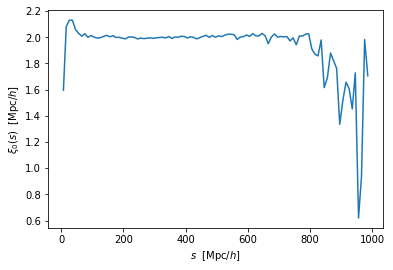

In [55]:
pl.plot(landy['r'], landy['xi'])

pl.xlabel(r'$s$  [Mpc/$h$]')
pl.ylabel(r'$\xi_0(s)$  [Mpc/$h$]')

####  Done.